# We have to include some used libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import read_csv,set_option
import numpy as np
from sklearn.feature_selection import SelectKBest,chi2,RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,cross_val_score,LeaveOneOut,train_test_split,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from time import time
from sklearn.metrics import f1_score,accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.externals import joblib
import seaborn as sns
from sklearn.naive_bayes import GaussianNB


# Phase 0: Data Exploration
 Loading cvs file from project file

 For thi project we wil use data from UCI data set 

In [3]:
title=['Preg','Plas','Pres','Skin','Test','Mass','Pedi','Age','Class'] 
data=read_csv('pim.csv', names=title, sep=',')

# The variable heading have the following meanings:
    
    variables     Explanation 
    
    .pedi         pedigree fuction
    .plas         Plasma glucose concentration
    .pres         Diastolic blood pressure 
    .skin         Triceps Skin fold thickness 
    .test         Two hours serum insulin
    .mass         Body Mass index 
    .age          age 
    .peg          Number of times Pregnant
    .class        Class variable( 0 = Not; 1 = Diabetes )


In [4]:
print("Diabetes dataset diamensions: {}".format(data.shape))

Diabetes dataset diamensions: (768, 9)


In [5]:
print("Data set have the following data at the top: \n\n {}".format(data.head(10)))

Data set have the following data at the top: 

    Preg  Plas  Pres  Skin  Test  Mass   Pedi  Age  Class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
5     5   116    74     0     0  25.6  0.201   30      0
6     3    78    50    32    88  31.0  0.248   26      1
7    10   115     0     0     0  35.3  0.134   29      0
8     2   197    70    45   543  30.5  0.158   53      1
9     8   125    96     0     0   0.0  0.232   54      1


In [6]:
#Check the datatype

In [7]:
data.describe()

,Preg,Plas,Pres,Skin,Test,Mass,Pedi,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.dtypes

Preg       int64
Plas       int64
Pres       int64
Skin       int64
Test       int64
Mass     float64
Pedi     float64
Age        int64
Class      int64
dtype: object

In [9]:
data.groupby('Class').size()

Class
0    500
1    268
dtype: int64

# Now we visualize our dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CA11C38F60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001CA11F7B668>]], dtype=object)

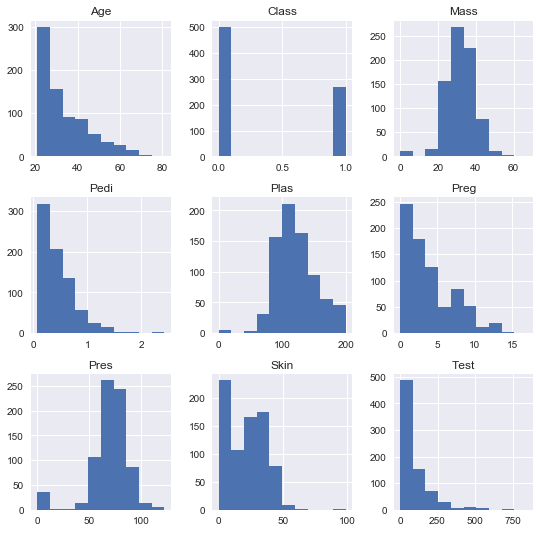

In [18]:
data.hist(figsize=(9,9))

Class
0    [[Axes(0.125,0.670278;0.215278x0.209722), Axes...
1    [[Axes(0.125,0.670278;0.215278x0.209722), Axes...
dtype: object

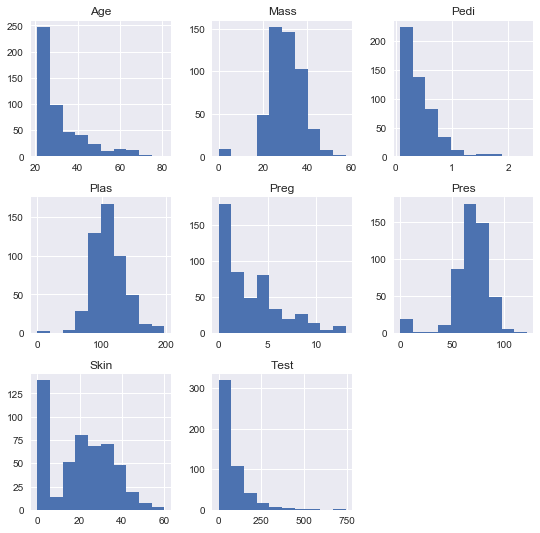

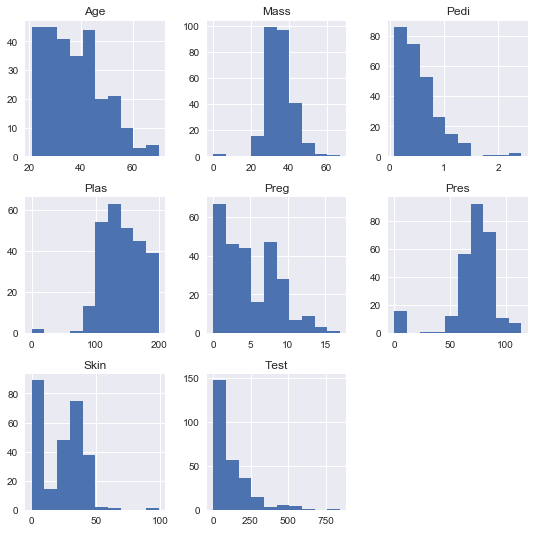

In [19]:
data.groupby('Class').hist(figsize=(9,9))

# Phase 2: Data cleaning

# Miss or Null data Points

In [13]:
data.isnull().sum()

Preg     0
Plas     0
Pres     0
Skin     0
Test     0
Mass     0
Pedi     0
Age      0
Class    0
dtype: int64

# Unexpected Outliers

In [20]:
print("Total : ", data[data.Pres==0].shape[0])
print(data[data.Pres==0].groupby('Class')['Age'].count())
print()

#For mass
print("Total : ",data[data.Mass==0].shape[0])
print(data[data.Mass==0].groupby('Class')['Age'].count())
print()

#For Pedi
print("Total : ",data[data.Pedi==0].shape[0])
print(data[data.Pedi==0].groupby('Class')['Age'].count())
print()

#For plas
print("Total : ",data[data.Plas==0].shape[0])
print(data[data.Plas==0].groupby('Class')['Age'].count())
print()

#For pres
print("Total : ",data[data.Pres==0].shape[0])
print(data[data.Pres==0].groupby('Class')['Age'].count())
print()

#For preg
print("Total : ",data[data.Preg==0].shape[0])
print(data[data.Preg==0].groupby('Class')['Age'].count())
print()

#For Skin
print("Total : ",data[data.Skin==0].shape[0])
print(data[data.Skin==0].groupby('Class')['Age'].count())
print()

#For Test
print("Total : ",data[data.Test==0].shape[0])
print(data[data.Test==0].groupby('Class')['Age'].count())
print()
#For Test
print("Total : ",data[data.Age==0].shape[0])
print(data[data.Age==0].groupby('Class')['Age'].count())
print()

Total :  35
Class
0    19
1    16
Name: Age, dtype: int64

Total :  11
Class
0    9
1    2
Name: Age, dtype: int64

Total :  0
Series([], Name: Age, dtype: int64)

Total :  5
Class
0    3
1    2
Name: Age, dtype: int64

Total :  35
Class
0    19
1    16
Name: Age, dtype: int64

Total :  111
Class
0    73
1    38
Name: Age, dtype: int64

Total :  227
Class
0    139
1     88
Name: Age, dtype: int64

Total :  374
Class
0    236
1    138
Name: Age, dtype: int64

Total :  0
Series([], Name: Age, dtype: int64)



# PHASE 3: Model selection

#Feture/Responce

In [21]:
diabetes_mod = data[(data.Pres != 0) & (data.Mass != 0) & (data.Plas != 0)]
print(diabetes_mod.shape)

(724, 9)


In [23]:
feature=['Preg','Plas','Pres', 'Skin', 'Test', 'Pedi','Mass', 'Age']

# Features/Response
#feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_mod[feature]
y = diabetes_mod.Class

In [24]:
#Inintial model selection progress

In [25]:
# Initial model selection process
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

# using Train/Test split

In [26]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes_mod.Class, random_state=0)

In [27]:
names = []
scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.729282
1  SVC  0.657459
2   LR  0.767956
3   DT  0.734807
4  GNB  0.734807
5   RF  0.779006
6   GB  0.773481


# Using K-Fold cross validation

In [28]:
strat_k_fold = StratifiedKFold(n_splits=10, random_state=10)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.711521
1  SVC  0.656075
2   LR  0.775032
3   DT  0.684124
4  GNB  0.755681
5   RF  0.743313
6   GB  0.761332


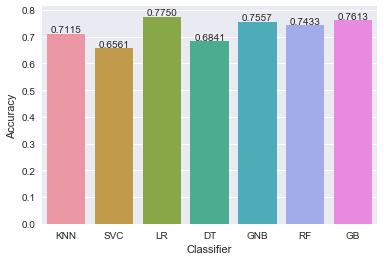

In [29]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

# Phase 5 - Feature Selection (Revisited)

# Logistic Regression

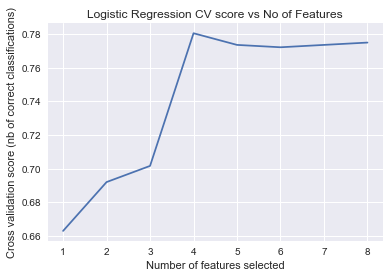

In [30]:
logreg_model = LogisticRegression()

rfecv = RFECV(estimator=logreg_model, step=1, cv=strat_k_fold, scoring='accuracy')
rfecv.fit(X, y)

plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [31]:
feature_importance = list(zip(feature, rfecv.support_))

new_features = []

for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['Preg', 'Plas', 'Pedi', 'Mass']


In [32]:
# Calculate accuracy scores 
X_new = diabetes_mod[new_features]

initial_score = cross_val_score(logreg_model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))

fe_score = cross_val_score(logreg_model, X_new, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

Initial accuracy : 0.7750316204686261 
Accuracy after Feature Selection : 0.7805877119643279 


# Gradient Boost

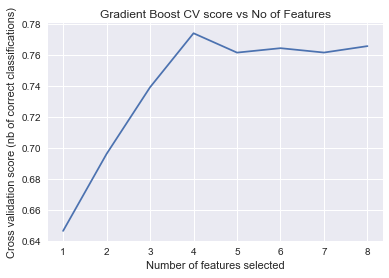

In [33]:
gb_model = GradientBoostingClassifier()

gb_rfecv = RFECV(estimator=gb_model, step=1, cv=strat_k_fold, scoring='accuracy')
gb_rfecv.fit(X, y)

plt.figure()
plt.title('Gradient Boost CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(gb_rfecv.grid_scores_) + 1), gb_rfecv.grid_scores_)
plt.show()

In [34]:
feature_importance = list(zip(feature, gb_rfecv.support_))

new_features = []

for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['Plas', 'Pedi', 'Mass', 'Age']


In [35]:
X_new_gb = diabetes_mod[new_features]

initial_score = cross_val_score(gb_model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))

fe_score = cross_val_score(gb_model, X_new_gb, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

Initial accuracy : 0.766811906446288 
Accuracy after Feature Selection : 0.7737383968958347 


# Phase 6 - Model Parameter Tuning

In [36]:
# Specify parameters
c_values = list(np.arange(1, 10))

param_grid = [
    {'C': c_values, 'penalty': ['l1'], 'solver' : ['liblinear'], 'multi_class' : ['ovr']},
    {'C': c_values, 'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class' : ['ovr']}
]

In [37]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=strat_k_fold, scoring='accuracy')
grid.fit(X_new, y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=False),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'penalty': ['l1'], 'solver': ['liblinear'], 'multi_class': ['ovr']}, {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'penalty': ['l2'], 'solver': ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class': ['ovr']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [38]:
print("Best parameter: ",grid.best_params_)
print("Best Estimator: ",grid.best_estimator_)

Best parameter:  {'C': 1, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
Best Estimator:  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [39]:
logreg_new = LogisticRegression(C=1, multi_class='ovr', penalty='l2', solver='liblinear')

In [40]:
initial_score = cross_val_score(logreg_new, X_new, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Final accuracy : {} ".format(initial_score))

Final accuracy : 0.7805877119643279 
